# Regressão Logística

## Introdução
Um problema de classificação é quando queremos categorizar alguma variável por classes. Nesse caso, a varável $\pmb{y}$ que queremos prever é discreta. Um exemplo seria saber se uma pessoa ganha mais de R$ 50000 anuais, com base nas suas informações socioeconômicas, ou saber se uma pessoa pedindo crédito em um banco vai pagar o que deverá corretamente.

Como exemplo ilustrativo, vamos supor que somos uma agência de seguros e estamos decidindo se devemos ou não segurar o carro, com base nas informações sociais dos seus donos. Por motivos de simplicidade, vamos dizer que a probabilidade da pessoa bater o carro só dependa to tempo que ela gastou na autoescola; nós temos acesso à esse tempo, mas não sabemos exatamente como ele se relaciona com a probabilidade da pessoas segurada sofrer um acidente automobilístico.

Nós então olhamos no nosso arquivo o caso de 15 pessoas, onde temos tanto os dados de tempo na autoescola e se elas sofreram ou não acidente. Se nós colocarmos nossos dados em um gráfico (x, y) ele seria mais ou menos da seguinte forma:

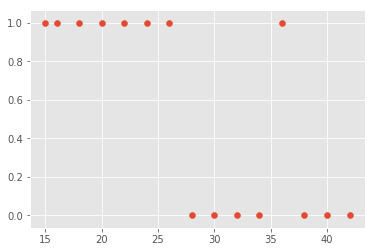

In [2]:
import numpy as np
from matplotlib import pyplot as plt, style
from IPython import display

style.use('ggplot')
np.random.seed(2)

x = np.linspace(15,42,15).astype(int)
y_logit = x*-0.5 + 15 + np.random.normal(0,1.5, x.shape)
y = np.round(np.exp(y_logit) / (np.exp(y_logit) + 1), 0)

plt.scatter(x, y)
plt.show()

Nós podemos ver então que a maioria das pessoas que sofreram um acidente de carro passaram pouco tempo na autoescola. Mas nós queremos mais do que isso. Queremos algum modelo capaz de prever a probabilidade da pessoa sofrer um acidente com base no tempo que durou a autoescola dela.

Uma forma ingênua de resolver esse problema seria utilizar regressão linear. Para tomar uma decisão de segurar ou não o carro, poderíamos então um limiar: só iremos segurar pessoas cuja previsão de acidente for menos de 0.5. A linha que melhor se ajusta aos dados seria então mais ou menos assim:

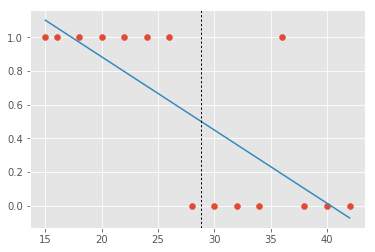

In [4]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
line = regr.predict(x.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x, line, c='C1')
plt.axvline(x=(0.5 - regr.intercept_)/regr.coef_, c='k', ls='dotted', lw=1)
plt.show()


Nesse caso, utilizar regressão linear e estabelecer um limiar funcionaria muito bem! Se colocássemos o nosso limiar em 0.5, preveríamos que todos à direita da curva pontilhada não sofreriam um acidente e erraríamos em apenas dois casos. 

No entanto, suponha agora que nos nossos dados haja uma pessoa com muitas horas de autoescola. Digamos, umas 100 horas. Essa pessoa não sofreu nenhum acidente e de certa forma ter ela nos dados não traz muita informação nova: ela foi tão treinada que dificilmente preveríamos que sofreria um acidente.

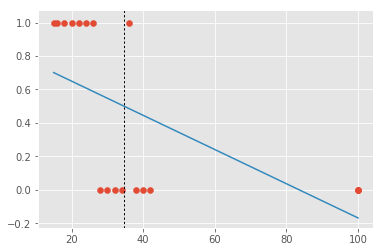

In [7]:
x_ = np.array([[100]])
y_ =  x_*-0.5 + 15 + np.random.normal(0,1.5, 1)
y_ = np.round(np.exp(y_) / (np.exp(y_) + 1), 0)

x = np.append(x, x_)
y = np.append(y, y_)

regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
line = regr.predict(x.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x, line, c='C1')
plt.axvline(x=(0.5 - regr.intercept_)/regr.coef_, c='k', ls='dotted', lw=1)
plt.show()


No entanto, essa pessoa super treinada faz com que nossa linha de regressão seja puxada para a direita, fazendo com que classifiquemos muitas das pessoas de baixo risco como tendo alta probabilidade de sofrerem acidentes. Podemos ver mais um comportamento estranho com o algoritmo de regressão linear: para pessoas com mais de 70 horas de autoescola, ele está prevendo uma probabilidade negativa de acidente, o que simplesmente não tem sentido.

Para resolver isso, em vez de utilizar regressão linear, vamos utilizar a regressão logística sempre que nos depararmos com problemas de classificação. Regressão logística nos fornecerá uma previsão sempre entre 0 e 1, de forma que possamos interpretar seus resultados como uma probabilidade válida. Além disso, regressão logística não será influenciada por outliers que não fornecem muita informação nova, pois a atenção do algoritmo será concentrada na região de fronteira.

A intuição por trás de regressão logística é bastante simples: em vez de acharmos a reta que melhor se ajusta aos dados, vamos achar uma curva em formato de 'S' que melhor se ajusta aos dados:

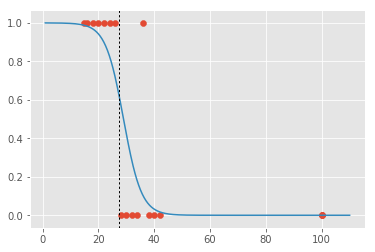

Acurácia: 0.889
Os parâmetros do modelos são: 9.033, -0.311


In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1e7)
clf.fit(x.reshape(-1,1), y)

def model(x):
    return 1 / (1 + np.exp(-x))

line = np.linspace(1, 110, 500)
line = model(line * clf.coef_ + clf.intercept_).ravel()

plt.scatter(x, y)
plt.plot(np.linspace(1, 110, 500), line, c='C1')
plt.axvline(x=(0.5 - clf.intercept_)/clf.coef_, c='k', ls='dotted', lw=1)
plt.show()

print 'Acurácia: %.3f' % clf.score(x.reshape(-1,1), y)
print 'Os parâmetros do modelos são: %.3f, %.3f' % (clf.intercept_, clf.coef_)


# Justificativa matemática

Para implementar regressão logística, precisamos de apenas duas modificações ao algoritmo de regressão linear. Em primeiro lugar, precisamos utilizar uma função achatamento após a transformação linear, de forma que o valor previsto pelo modelo possa ser interpretado como uma probabilidade (lembre que estamos tentando modelar uma variável binária, então queremos saber a probabilidade dela ser 0 ou 1). A função de achatamento que vamos utilizar é a função logística, ou sigmoide:
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

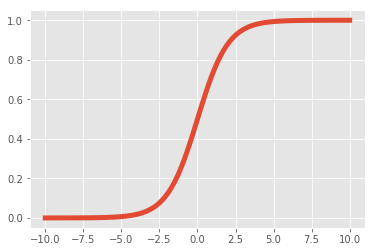

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
plt.plot(np.linspace(-10,10,100), sigmoid(np.linspace(-10,10,100)), lw=5)
plt.show()

O que a função sigmoide faz é simplesmente converter o score produzido pela transformação linear $\pmb{X}\pmb{\hat{w}}$ em uma probabilidade, de forma que quanto maior o score, maior a probabilidade prevista e vice versa. Agora, podemos utilizar 0.5 como um limiar, da mesma forma que havíamos feito com a nossa solução ingênua utilizando regressão linear. A vantagem agora é que, além da previsão ser uma probabilidade válida, a regressão logística não é sensível ao pontos com scores muito altos ou muito baixos. 

Lembre-se de como com regressão linear tínhamos um modelo na forma $\pmb{y}=\pmb{X}\pmb{w} + \pmb{\epsilon}$, de forma que nossas previsões eram da forma $\pmb{\hat{y}}=\pmb{X}\pmb{\hat{w}}$. Agora, com regressão logística, nosso modelo fica:

$$\pmb{y}=\sigma(\pmb{X}\pmb{w} + \pmb{\epsilon})$$

De forma que nossas previsões serão uma probabilidade resultado de $\pmb{\hat{y}}=\sigma(\pmb{X}\pmb{\hat{w}})$. Novamente, nosso objetivo será aprender os parâmetros $\pmb{\hat{w}}$ de forma a minimizar uma função custo. 

A segunda modificação que devemos fazer no algoritmo de regressão linear é alterar a função custo. Agora, em vez de tentarmos minimizar a distância entre o valor previsto e o observado, nós vamos minimizar a **entropia cruzada**:

$$L=\begin{cases} 
-log(\hat{y}) & se \space y=1\\
-log(1-\hat{y}) & se \space y=0\\
\end{cases}$$

Para entender essa função custo, vamos analisar cada caso separadamente. Se $y=1$ e $\hat{y}=1$, $-log(\hat{y})=0$. No entanto, quanto mais $\hat{y}$ se aproxima de 0, $-log(\hat{y})$ cresce exponencialmente para o infinito. Por outro lado, se $y=0$ e $\hat{y}=0$, podemos ver que $-log(1-\hat{y})=0$. Mas $-log(1-\hat{y})=0$ vai para o infinito conforme $\hat{y}$ se distancia de $0$. Nós podemos resumir a função custo de entropia cruzada da seguinte forma:

$$L=\sum -y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

Nós podemos então substituir $\hat{y}$ por $\sigma(\pmb{X}\pmb{w})$ e diferenciar $L$ com respeito aos parâmetros:

$$\frac{\partial L}{\partial w_j}=\sum \Big(\frac{y}{\sigma(\pmb{x}_i \pmb{w})} - \frac{(1-y)}{1-\sigma(\pmb{x}_i \pmb{w})} \Big) \frac{\partial\sigma(\pmb{x}_i \pmb{w})}{\partial \pmb{w}}$$

Como é bastante entediante e desnecessário realizar o passo à passo dessa derivada, vamos pular direto par o resultado, que é incrivelmente simples:

$$\frac{\partial L}{\partial w_j}=\sum x_i(\sigma(\pmb{x}_i \pmb{w}) - y)=\sum x_i(\hat{y} - y)$$

E terminamos. Já temos toda a informação necessária para implementar uma regressão logística: bastará atualizar os parâmetros $\pmb{\hat{w}}$ iterativamente com gradiente descendente.

## Implementação
Nossa implementação de regressão logística será extremamente similar à de regressão linear com gradiente descendente. A única modificação será na atualização do gradiente, que utilizara as derivadas computadas acima.

In [6]:
class logistic_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=100):
        self.learning_rate = learning_rate # taxa de aprendizado
        self.training_iters = training_iters # iterações de treino
        
    
    def _logistic(self, X):
        '''Função logística'''
        return  1 / (1 + np.exp(-np.dot(X, self.w_hat)))
    
    
    def fit(self, X_train, y_train):
        
        # formata os dados
        if len(X_train.shape) < 2:
            X = X_train.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
               
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,1, size = X[0].shape)
        
        # loop de treinamento
        for _ in range(self.training_iters):
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação de todos os pontos
            for var in range(len(gradient)):
                gradient[var] += np.dot((self._logistic(X) - y_train), X[:,var])
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado

            # atualiza os parâmetros
            self.w_hat -= gradient
            
            
    def predict(self, X_test):
        
        # formata os dados
        if len(X_test.shape) < 2:
            X = X_test.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # aplica função logística
        logit = self._logistic(X) 
        
        # aplica limiar
        return np.greater_equal(logit, 0.5).astype(int)
       
    

regr = logistic_regr(learning_rate=0.001, training_iters=90000)
regr.fit(x, y)
y_hat = regr.predict(x)
print 'Acurácia: ', np.mean(np.equal(y_hat, y))
print 'Os parâmetros do modelos são: %.3f, %.3f' % (regr.w_hat[0], regr.w_hat[1])


Acurácia:  0.875
Os parâmetros do modelos são: 9.035, -0.311


Nós podemos ver que a nossa implementação aprendeu parâmetros muito similares aos obtidos acima com uma regressão logística de mercado. Além disso, nosso modelo também tem uma acurácia de 87,5%, o que mostra que provavelmente não erramos nada. No entanto, nossa implementação é bem mais lenta do que a de mercado.

Para melhorar isso, poderíamos implementar alguma melhoria no algoritmo de otimização,como utilizar GDE com momento. Como isso seria demasiadamente preditivo, vamos parar por aqui. Afinal, na prática, basta utilizar um algoritmo de regressão logística pronto que não precisaremos nos preocupar com esses detalhes.

## Indo um pouco além: Perceptrons e a inspiração biológica para regressão logística

Regressão logística pode ser vista como um tipo de perceptron, um algoritmo antigo de inteligência artificial que tem se inspira levemente no funcionamento dos neurônios. De maneira bem simplificada, nós podemos pensar nos neurônios como células que recebem um sinal e passam esse sinal adiante se um limiar for excedido. Isso é exatamente o que a regressão logística faz: pondera um sinal de várias variáveis, soma esses sinais, e passa por uma função achatamento, produzindo uma probabilidade. Se essa probabilidade for maior do que um limiar, a regressão logística o os perceptrons ativam, ou seja, retornam 1. Caso os sinais recebidos não forem fortes o suficiente, a regressão logística e os perceptrons não disparam, produzindo zero.

As diferenças entre perceptrons e regressão logística são muito sutis que nem vale a pena mencioná-las. Mais importante é saber do que são capazes esses modelos e quais as suas limitações. 

Em primeiro lugar, precisamos entender que a regressão logística e os perceptrons acham uma linha de separação entre as classes. Se essa linha existir, esses modelos irão encontrá-las com certeza, dado uma taxa de aprendizado suficientemente baixa e um numero suficiente de iterações de treino. 

In [7]:
class perceptron(object):

    def __init__(self, lrate = 1, w=None, maxiter=3, tol = 0, plot_= False):
        self.lrate = lrate
        self.maxiter = maxiter
        self.tol = tol
        self.plot_ = plot_
        self.w = w

    def __update_w(self, X_train, y_train):

        for xi, yi in zip(X_train, y_train):

            if int(np.sign(np.dot(xi, self.w.T))) != int(yi):
                self.w += (xi.T * self.lrate)*yi


    def __eval_perceptron(self, X_train, y_train):

        error = 0
        miss_indx = []
        for xi, yi, i in zip(X_train, y_train, range(len(y_train))):

            if int(np.sign(np.dot(xi, self.w.T))) != int(yi):
                error += 1

        return error


    def _plot(self, X, y, true_w=None):
        a, b = -self.w[1]/self.w[2], -self.w[0]/self.w[2] 
        l = np.linspace(-1,1)
        ax = plt.subplot(111)
        
        ax.plot(l, a*l+b, 'green')
        cols = {1: 'r', -1: 'b'}
        
        ax.set_xlim([-1,1])
        ax.set_ylim([-1,1])
        
        for x,s in zip(X, y):
            ax.plot(x[0], x[1], cols[s]+'o')

        if not true_w is None:
            a, b = -true_w[1]/true_w[2], -true_w[0]/true_w[2] 
            ax.plot(l, a*l+b, '-k')
            
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.clf() # limpa a imagem do gráfico
        

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        X_train = np.insert(X_train, 0, 1, 1) # adiciona vies
        y_train = np.array(y_train)

        if self.w is None:
            self.w = np.random.normal(0, 10, len(X_train[0]))

        count = 0
        while True:

            error = self.__eval_perceptron(X_train, y_train)
            self.__update_w(X_train, y_train)

            count += 1
            if error < self.tol or count > self.maxiter:
                break

            if self.plot_:
                self._plot(X_train[:, 1:], y_train)


    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, 1)
        return np.sign(np.dot(X_test, self.w.T))



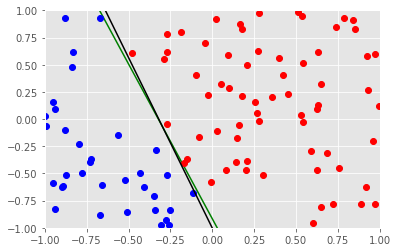

In [8]:
np.random.seed(5)
# gera dados linearmente separáveis em 2D
x1,y1,x2,y2 = [np.random.uniform(-1, 1) for i in range(4)] # define 2 pontos
w_target = np.array([x2*y1-x1*y2, y2-y1, x1-x2]) # gera vetor
a, b = -w_target[1]/w_target[2], -w_target[0]/w_target[2] # para desenhar

X = np.random.uniform(-1, 1, (100, 2)) # gera 100 pontos 
y = np.sign(np.dot(np.insert(X, 0, 1, 1), w_target.T)) # gera targets


# usa perceptron para separar os dados	
clf = perceptron(maxiter=30, lrate = .1, plot_ = True)
clf.fit(X, y)

# mostra resultados
clf._plot(X, y, true_w = w_target)



No entanto, exitem duas limitações que devemos nos atentar quando utilizando esses modelos. A primeira é que nem regressão logística e nem perceptrons conseguem achar a fronteira de separação entre as classes se essa fronteira não for uma reta. Essa limitação vem do fato desses modelos serem lineares. A segunda limitação é que regressão logística e perceptrons acham apenas alguma reta de separação entre as classes, mas não é garantido que eles encontrem a melhor reta de separação.